In [94]:
import pandas as pd
#from catboost import CatBoostClassifier
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer


In [95]:
train_df = pd.read_csv("C:/Users/udbha/Desktop/Python/competitions/titanic/data/train.csv")
test_df = pd.read_csv("C:/Users/udbha/Desktop/Python/competitions/titanic/data/test.csv")

In [96]:
test_df.Fare.fillna(test_df.Fare.mean(), inplace=True)
data_df = train_df.append(test_df) # The entire data: train + test.
passenger_id=test_df['PassengerId']

## We will drop PassengerID and Ticket since it will be useless for our data. 
train_df.drop(['PassengerId'], axis=1, inplace=True)
test_df.drop(['PassengerId'], axis=1, inplace=True)
test_df.shape

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(418, 10)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
********************
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64


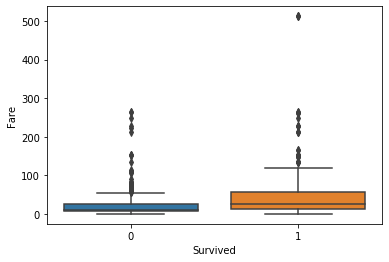

In [97]:
print (train_df.isnull().sum())
print (''.center(20, "*"))
print (test_df.isnull().sum())
sns.boxplot(x='Survived',y='Fare',data=train_df)

In [98]:
train_df=train_df[train_df['Fare']<400]

In [99]:
train_df['Sex'] = train_df.Sex.apply(lambda x: 0 if x == "female" else 1)
test_df['Sex'] = test_df.Sex.apply(lambda x: 0 if x == "female" else 1)

In [100]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [101]:
pd.options.display.max_columns = 99
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [102]:
for name_string in data_df['Name']:
    data_df['Title']=data_df['Name'].str.extract('([A-Za-z]+)\.',expand=True)
    
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
data_df.replace({'Title': mapping}, inplace=True)

data_df['Title'].value_counts()
train_df['Title']=data_df['Title'][:891]
test_df['Title']=data_df['Title'][891:]

titles=['Mr','Miss','Mrs','Master','Rev','Dr']
for title in titles:
    age_to_impute = data_df.groupby('Title')['Age'].median()[titles.index(title)]
    #print(age_to_impute)
    data_df.loc[(data_df['Age'].isnull()) & (data_df['Title'] == title), 'Age'] = age_to_impute
data_df.isnull().sum()



train_df['Age']=data_df['Age'][:891]
test_df['Age']=data_df['Age'][891:]
test_df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
Title         0
dtype: int64

In [103]:
## Family_size seems like a good feature to create
train_df['family_size'] = train_df.SibSp + train_df.Parch+1
test_df['family_size'] = test_df.SibSp + test_df.Parch+1

In [104]:
def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

train_df['family_group'] = train_df['family_size'].map(family_group)
test_df['family_group'] = test_df['family_size'].map(family_group)

In [105]:
train_df['child'] = [1 if i<16 else 0 for i in train_df.Age]
test_df['child'] = [1 if i<16 else 0 for i in test_df.Age]
train_df.child.value_counts()

0    769
1    119
Name: child, dtype: int64

In [106]:
train_df['calculated_fare'] = train_df.Fare/train_df.family_size
test_df['calculated_fare'] = test_df.Fare/test_df.family_size

In [107]:
def fare_group(fare):
    a= ''
    if fare <= 5:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

In [108]:
train_df['fare_group'] = train_df['calculated_fare'].map(fare_group)
test_df['fare_group'] = test_df['calculated_fare'].map(fare_group)

In [109]:
#comment after use
train_df = pd.get_dummies(train_df, columns=['Title',"Pclass",'Embarked', 'family_group', 'fare_group'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Title',"Pclass",'Embarked', 'family_group', 'fare_group'], drop_first=True)
train_df.drop(['Cabin', 'family_size','Ticket','Name', 'Fare'], axis=1, inplace=True)
test_df.drop(['Ticket','Name','family_size',"Fare",'Cabin'], axis=1, inplace=True)

In [110]:
def age_group_fun(age):
    a = ''
    if age <= 2:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 15:
        a = 'child'
    elif age <= 19:
        a = 'teenager'
    elif age <= 32:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        

In [111]:
train_df['age_group'] = train_df['Age'].map(age_group_fun)
test_df['age_group'] = test_df['Age'].map(age_group_fun)

In [112]:
train_df = pd.get_dummies(train_df,columns=['age_group'], drop_first=True)
test_df = pd.get_dummies(test_df,columns=['age_group'], drop_first=True)
#Lets try all after dropping few of the column.
train_df.drop(['Age','calculated_fare'],axis=1,inplace=True)
test_df.drop(['Age','calculated_fare'],axis=1,inplace=True)

In [113]:
train_df.head()
train_df.drop(['Title_Rev','age_group_old','age_group_teenager','age_group_senior_citizen','Embarked_Q'],axis=1,inplace=True)
test_df.drop(['Title_Rev','age_group_old','age_group_teenager','age_group_senior_citizen','Embarked_Q'],axis=1,inplace=True)

In [114]:
X = train_df.drop('Survived', 1)
y = train_df['Survived']
#testing = test_df.copy()
#testing.shape

In [115]:
from catboost import CatBoostClassifier

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    svm.SVC(probability=True),
    DecisionTreeClassifier(),
    CatBoostClassifier(),
    XGBClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

In [117]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

SSplit=StratifiedShuffleSplit(test_size=0.2,random_state=7)
acc_dict = {}

for train_index,test_index in SSplit.split(X,y):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
          
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Learning rate set to 0.015207
0:	learn: 0.6832314	total: 22ms	remaining: 21.9s
1:	learn: 0.6723773	total: 44.2ms	remaining: 22.1s
2:	learn: 0.6634575	total: 67.3ms	remaining: 22.4s
3:	learn: 0.6551520	total: 92.8ms	remaining: 23.1s
4:	learn: 0.6497474	total: 104ms	remaining: 20.7s
5:	learn: 0.6402234	total: 134ms	remaining: 22.2s
6:	learn: 0.6319705	total: 159ms	remaining: 22.5s
7:	learn: 0.6269308	total: 173ms	remaining: 21.5s
8:	learn: 0.6199169	total: 192ms	remaining: 21.1s
9:	learn: 0.6119214	total: 222ms	remaining: 22s
10:	learn: 0.6060242	total: 236ms	remaining: 21.2s
11:	learn: 0.5990403	total: 254ms	remaining: 20.9s
12:	learn: 0.5922798	total: 273ms	remaining: 20.7s
13:	learn: 0.5854272	total: 298ms	remaining: 21s
14:	learn: 0.5783076	total: 322ms	remaining: 21.1s
15:	learn: 0.5737488	total: 335ms	remaining: 20.6s
16:	learn: 0.5672234	total: 355ms	remaining: 20.5s
17:	learn: 0.5629273	total: 374ms	remaining: 20.4s
18:	learn: 0.5593085	total: 406ms	remaining: 21s
19:	learn: 0.55

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will chan

Learning rate set to 0.015207
0:	learn: 0.6840968	total: 28ms	remaining: 27.9s
1:	learn: 0.6758761	total: 57.1ms	remaining: 28.5s
2:	learn: 0.6671329	total: 86ms	remaining: 28.6s
3:	learn: 0.6593207	total: 109ms	remaining: 27.2s
4:	learn: 0.6521562	total: 130ms	remaining: 25.9s
5:	learn: 0.6446085	total: 153ms	remaining: 25.4s
6:	learn: 0.6382703	total: 171ms	remaining: 24.2s
7:	learn: 0.6334011	total: 179ms	remaining: 22.2s
8:	learn: 0.6264508	total: 206ms	remaining: 22.6s
9:	learn: 0.6204471	total: 219ms	remaining: 21.7s
10:	learn: 0.6133164	total: 241ms	remaining: 21.7s
11:	learn: 0.6078972	total: 266ms	remaining: 21.9s
12:	learn: 0.6027344	total: 287ms	remaining: 21.8s
13:	learn: 0.5961207	total: 308ms	remaining: 21.7s
14:	learn: 0.5900424	total: 330ms	remaining: 21.7s
15:	learn: 0.5833113	total: 359ms	remaining: 22.1s
16:	learn: 0.5777124	total: 385ms	remaining: 22.3s
17:	learn: 0.5722549	total: 406ms	remaining: 22.2s
18:	learn: 0.5665993	total: 429ms	remaining: 22.2s
19:	learn: 0

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Learning rate set to 0.015207
0:	learn: 0.6837375	total: 25.7ms	remaining: 25.7s
1:	learn: 0.6734841	total: 51.3ms	remaining: 25.6s
2:	learn: 0.6650943	total: 73.4ms	remaining: 24.4s
3:	learn: 0.6560034	total: 103ms	remaining: 25.7s
4:	learn: 0.6509439	total: 113ms	remaining: 22.6s
5:	learn: 0.6423803	total: 136ms	remaining: 22.5s
6:	learn: 0.6346967	total: 157ms	remaining: 22.3s
7:	learn: 0.6269465	total: 180ms	remaining: 22.3s
8:	learn: 0.6208406	total: 204ms	remaining: 22.4s
9:	learn: 0.6151315	total: 226ms	remaining: 22.4s
10:	learn: 0.6093576	total: 243ms	remaining: 21.9s
11:	learn: 0.6014319	total: 266ms	remaining: 21.9s
12:	learn: 0.5958924	total: 287ms	remaining: 21.8s
13:	learn: 0.5907810	total: 310ms	remaining: 21.8s
14:	learn: 0.5839994	total: 330ms	remaining: 21.7s
15:	learn: 0.5792660	total: 352ms	remaining: 21.6s
16:	learn: 0.5747876	total: 372ms	remaining: 21.5s
17:	learn: 0.5709256	total: 398ms	remaining: 21.7s
18:	learn: 0.5655295	total: 417ms	remaining: 21.5s
19:	lear

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Learning rate set to 0.015207
0:	learn: 0.6830954	total: 24.4ms	remaining: 24.4s
1:	learn: 0.6723007	total: 50.3ms	remaining: 25.1s
2:	learn: 0.6624863	total: 73.8ms	remaining: 24.5s
3:	learn: 0.6547716	total: 100ms	remaining: 25s
4:	learn: 0.6452834	total: 123ms	remaining: 24.5s
5:	learn: 0.6362850	total: 145ms	remaining: 24s
6:	learn: 0.6298018	total: 163ms	remaining: 23.1s
7:	learn: 0.6248112	total: 173ms	remaining: 21.4s
8:	learn: 0.6164539	total: 194ms	remaining: 21.4s
9:	learn: 0.6079361	total: 216ms	remaining: 21.4s
10:	learn: 0.6007915	total: 237ms	remaining: 21.3s
11:	learn: 0.5946510	total: 258ms	remaining: 21.3s
12:	learn: 0.5870247	total: 280ms	remaining: 21.3s
13:	learn: 0.5804075	total: 302ms	remaining: 21.3s
14:	learn: 0.5748404	total: 327ms	remaining: 21.5s
15:	learn: 0.5686757	total: 350ms	remaining: 21.5s
16:	learn: 0.5625595	total: 374ms	remaining: 21.6s
17:	learn: 0.5566313	total: 397ms	remaining: 21.7s
18:	learn: 0.5516241	total: 421ms	remaining: 21.7s
19:	learn: 0

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Learning rate set to 0.015207
0:	learn: 0.6833732	total: 25.4ms	remaining: 25.3s
1:	learn: 0.6729769	total: 52.9ms	remaining: 26.4s
2:	learn: 0.6642502	total: 79ms	remaining: 26.2s
3:	learn: 0.6555529	total: 101ms	remaining: 25s
4:	learn: 0.6480863	total: 126ms	remaining: 25.2s
5:	learn: 0.6400439	total: 148ms	remaining: 24.5s
6:	learn: 0.6332772	total: 167ms	remaining: 23.7s
7:	learn: 0.6266926	total: 184ms	remaining: 22.8s
8:	learn: 0.6194277	total: 205ms	remaining: 22.6s
9:	learn: 0.6114784	total: 229ms	remaining: 22.7s
10:	learn: 0.6049984	total: 250ms	remaining: 22.5s
11:	learn: 0.5979556	total: 271ms	remaining: 22.4s
12:	learn: 0.5910884	total: 293ms	remaining: 22.3s
13:	learn: 0.5846240	total: 317ms	remaining: 22.3s
14:	learn: 0.5781968	total: 342ms	remaining: 22.4s
15:	learn: 0.5735851	total: 364ms	remaining: 22.4s
16:	learn: 0.5688089	total: 385ms	remaining: 22.3s
17:	learn: 0.5628443	total: 409ms	remaining: 22.3s
18:	learn: 0.5567582	total: 431ms	remaining: 22.2s
19:	learn: 0

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Learning rate set to 0.015207
0:	learn: 0.6835518	total: 30.2ms	remaining: 30.1s
1:	learn: 0.6736046	total: 52.7ms	remaining: 26.3s
2:	learn: 0.6634975	total: 86.2ms	remaining: 28.6s
3:	learn: 0.6554833	total: 126ms	remaining: 31.4s
4:	learn: 0.6494197	total: 153ms	remaining: 30.5s
5:	learn: 0.6400256	total: 191ms	remaining: 31.7s
6:	learn: 0.6343655	total: 232ms	remaining: 32.8s
7:	learn: 0.6268755	total: 264ms	remaining: 32.7s
8:	learn: 0.6189220	total: 286ms	remaining: 31.5s
9:	learn: 0.6128731	total: 303ms	remaining: 30s
10:	learn: 0.6059929	total: 332ms	remaining: 29.9s
11:	learn: 0.5991385	total: 363ms	remaining: 29.9s
12:	learn: 0.5925478	total: 396ms	remaining: 30.1s
13:	learn: 0.5847495	total: 431ms	remaining: 30.3s
14:	learn: 0.5769610	total: 462ms	remaining: 30.4s
15:	learn: 0.5699499	total: 494ms	remaining: 30.4s
16:	learn: 0.5641890	total: 518ms	remaining: 29.9s
17:	learn: 0.5597214	total: 546ms	remaining: 29.8s
18:	learn: 0.5568184	total: 563ms	remaining: 29s
19:	learn: 0

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Learning rate set to 0.015207
0:	learn: 0.6837894	total: 31.2ms	remaining: 31.2s
1:	learn: 0.6757845	total: 56.1ms	remaining: 28s
2:	learn: 0.6681709	total: 82.8ms	remaining: 27.5s
3:	learn: 0.6602381	total: 108ms	remaining: 26.9s
4:	learn: 0.6523075	total: 133ms	remaining: 26.4s
5:	learn: 0.6441655	total: 155ms	remaining: 25.6s
6:	learn: 0.6380805	total: 173ms	remaining: 24.5s
7:	learn: 0.6319988	total: 197ms	remaining: 24.4s
8:	learn: 0.6258976	total: 220ms	remaining: 24.2s
9:	learn: 0.6183760	total: 241ms	remaining: 23.9s
10:	learn: 0.6138712	total: 262ms	remaining: 23.6s
11:	learn: 0.6089277	total: 277ms	remaining: 22.8s
12:	learn: 0.6022659	total: 298ms	remaining: 22.6s
13:	learn: 0.5972127	total: 318ms	remaining: 22.4s
14:	learn: 0.5919031	total: 343ms	remaining: 22.5s
15:	learn: 0.5857493	total: 366ms	remaining: 22.5s
16:	learn: 0.5808588	total: 387ms	remaining: 22.4s
17:	learn: 0.5748918	total: 411ms	remaining: 22.4s
18:	learn: 0.5711818	total: 428ms	remaining: 22.1s
19:	learn:

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Learning rate set to 0.015207
0:	learn: 0.6841629	total: 26ms	remaining: 25.9s
1:	learn: 0.6743748	total: 50ms	remaining: 25s
2:	learn: 0.6659656	total: 77.3ms	remaining: 25.7s
3:	learn: 0.6594966	total: 94.8ms	remaining: 23.6s
4:	learn: 0.6531416	total: 119ms	remaining: 23.7s
5:	learn: 0.6450342	total: 144ms	remaining: 23.8s
6:	learn: 0.6370319	total: 172ms	remaining: 24.4s
7:	learn: 0.6284125	total: 194ms	remaining: 24s
8:	learn: 0.6224703	total: 210ms	remaining: 23.2s
9:	learn: 0.6147415	total: 240ms	remaining: 23.7s
10:	learn: 0.6097257	total: 254ms	remaining: 22.8s
11:	learn: 0.6031838	total: 274ms	remaining: 22.6s
12:	learn: 0.5983334	total: 295ms	remaining: 22.4s
13:	learn: 0.5931068	total: 314ms	remaining: 22.1s
14:	learn: 0.5868613	total: 338ms	remaining: 22.2s
15:	learn: 0.5808569	total: 365ms	remaining: 22.5s
16:	learn: 0.5760603	total: 389ms	remaining: 22.5s
17:	learn: 0.5699885	total: 411ms	remaining: 22.4s
18:	learn: 0.5656202	total: 429ms	remaining: 22.2s
19:	learn: 0.55

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Learning rate set to 0.015207
0:	learn: 0.6828798	total: 26.5ms	remaining: 26.4s
1:	learn: 0.6724267	total: 52.1ms	remaining: 26s
2:	learn: 0.6637757	total: 78.9ms	remaining: 26.2s
3:	learn: 0.6549717	total: 97.6ms	remaining: 24.3s
4:	learn: 0.6484670	total: 115ms	remaining: 22.9s
5:	learn: 0.6394073	total: 136ms	remaining: 22.5s
6:	learn: 0.6319209	total: 159ms	remaining: 22.6s
7:	learn: 0.6249059	total: 183ms	remaining: 22.7s
8:	learn: 0.6171424	total: 201ms	remaining: 22.1s
9:	learn: 0.6105100	total: 215ms	remaining: 21.3s
10:	learn: 0.6049975	total: 234ms	remaining: 21s
11:	learn: 0.6004141	total: 247ms	remaining: 20.3s
12:	learn: 0.5939651	total: 263ms	remaining: 20s
13:	learn: 0.5877004	total: 284ms	remaining: 20s
14:	learn: 0.5816767	total: 306ms	remaining: 20.1s
15:	learn: 0.5752223	total: 327ms	remaining: 20.1s
16:	learn: 0.5696624	total: 342ms	remaining: 19.8s
17:	learn: 0.5655147	total: 354ms	remaining: 19.3s
18:	learn: 0.5591646	total: 374ms	remaining: 19.3s
19:	learn: 0.55

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Learning rate set to 0.015207
0:	learn: 0.6842512	total: 31.8ms	remaining: 31.8s
1:	learn: 0.6749370	total: 64ms	remaining: 31.9s
2:	learn: 0.6658803	total: 100ms	remaining: 33.2s
3:	learn: 0.6598574	total: 124ms	remaining: 31s
4:	learn: 0.6518375	total: 156ms	remaining: 31.1s
5:	learn: 0.6439663	total: 183ms	remaining: 30.3s
6:	learn: 0.6361988	total: 211ms	remaining: 30s
7:	learn: 0.6300509	total: 241ms	remaining: 29.9s
8:	learn: 0.6225415	total: 270ms	remaining: 29.8s
9:	learn: 0.6145429	total: 295ms	remaining: 29.2s
10:	learn: 0.6088959	total: 321ms	remaining: 28.9s
11:	learn: 0.6033808	total: 350ms	remaining: 28.8s
12:	learn: 0.5970382	total: 373ms	remaining: 28.3s
13:	learn: 0.5916839	total: 392ms	remaining: 27.6s
14:	learn: 0.5868247	total: 421ms	remaining: 27.7s
15:	learn: 0.5814894	total: 449ms	remaining: 27.6s
16:	learn: 0.5775854	total: 475ms	remaining: 27.4s
17:	learn: 0.5725505	total: 504ms	remaining: 27.5s
18:	learn: 0.5682688	total: 533ms	remaining: 27.5s
19:	learn: 0.56

C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1.0, 'Classifier Accuracy')

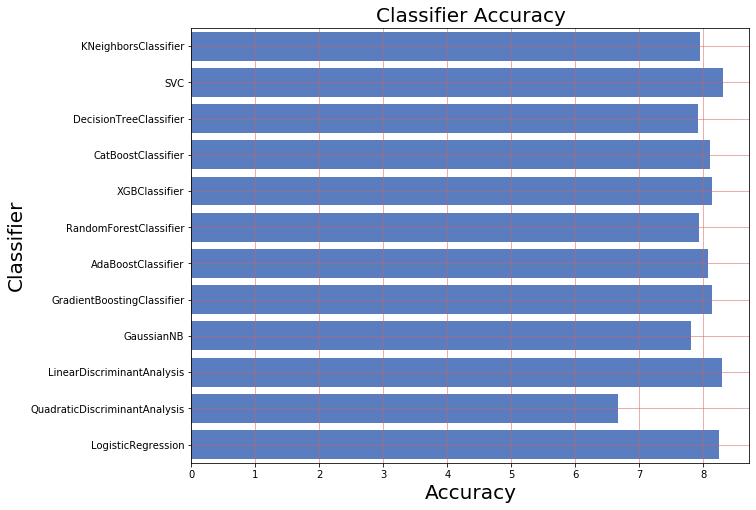

In [151]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
#log.set_index([[0,1,2,3,4,5,6,7,8,9]])
%matplotlib inline
sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=20)

In [152]:


## Necessary modules for creating models. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix



In [153]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
testframe = std_scaler.fit_transform(test_df)
testframe.shape

(418, 22)

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1000)

In [155]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score,recall_score,confusion_matrix
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(X_train,y_train)
predict=logreg.predict(X_test)
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))

0.8314606741573034
[[92 10]
 [20 56]]
0.8484848484848485
0.7368421052631579


In [156]:
C_vals = [0.0001, 0.001, 0.01, 0.1,0.13,0.2, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 4.0,4.5,5.0,5.1,5.5,6.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

param = {'penalty': penalties, 'C': C_vals, }
grid = GridSearchCV(logreg, param,verbose=False, cv = StratifiedKFold(n_splits=5,random_state=10,shuffle=True), n_jobs=1,scoring='accuracy')

In [157]:
grid.fit(X_train,y_train)
print (grid.best_params_)
print (grid.best_score_)
print(grid.best_estimator_)

{'C': 0.33, 'penalty': 'l1'}
0.8267605633802817
LogisticRegression(C=0.33, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [170]:
#grid.best_estimator_.fit(X_train,y_train)
#predict=grid.best_estimator_.predict(X_test)
#print(accuracy_score(y_test,predict))
logreg_grid=LogisticRegression(C=0.33, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
#logreg_grid = LogisticRegression(penalty=grid.best_params_['penalty'], C=grid.best_params_['C'])
logreg_grid.fit(X_train,y_train)
y_pred = logreg_grid.predict(X_test)
logreg_accy = round(accuracy_score(y_test, y_pred), 3)
print (logreg_accy)
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.843
[[94  8]
 [20 56]]
0.875
0.7368421052631579


In [171]:
AdaC=AdaBoostClassifier()

AdaC.fit(X_train,y_train)
predict=AdaC.predict(X_test)
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(precision_score(y_test,predict))

0.8146067415730337
[[89 13]
 [20 56]]
0.8115942028985508


In [172]:
from sklearn.tree import DecisionTreeClassifier
n_estimator=[50,60,100,150,200,300]
learning_rate=[0.001,0.01,0.1,0.2,0.3]
hyperparam={'n_estimators':n_estimator,'learning_rate':learning_rate}
gridBoost=GridSearchCV(AdaC,param_grid=hyperparam,verbose=False, cv = StratifiedKFold(n_splits=5,random_state=15,shuffle=True), n_jobs=1,scoring='accuracy')

In [173]:
gridBoost.fit(X_train,y_train)
print(gridBoost.best_score_)
print(gridBoost.best_estimator_)

0.8211267605633803
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=60, random_state=None)


In [174]:
gridBoost.params = gridBoost.best_params_
gridBoost.params

{'learning_rate': 0.2, 'n_estimators': 60}

In [182]:
gridBoost.best_estimator_.fit(X_train,y_train)
predict_grid=gridBoost.best_estimator_.predict(X_test)
print(accuracy_score(y_test,predict))

0.8426966292134831


In [176]:
xgb=XGBClassifier(max_depth=2, n_estimators=700, learning_rate=0.009,nthread=-1,subsample=1,colsample_bytree=0.8)
xgb.fit(X_train,y_train)
predict=xgb.predict(X_test)
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))

0.8258426966292135
[[93  9]
 [22 54]]
0.8571428571428571
0.7105263157894737


In [187]:
paramsxgb = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [191]:
folds = 3
param_comb = 5
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

In [194]:
grid = GridSearchCV(estimator=xgb, param_grid=paramsxgb, scoring='accuracy', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3 )
grid.fit(X_train, y_train)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   19.3s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:   39.5s
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 1215 out of 1215 | elapsed:  3.0min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x000001E2E9E319A8>,
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.02, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=600, n_jobs=1,
                                     nthread=1, objective=...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=True,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=4,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], '

In [202]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.02, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=600, n_jobs=1,
                                     nthread=1,
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=True,
                                     subsample=1, verbosity=1)

In [203]:
xgb.fit(X_train,y_train)
predict=xgb.predict(X_test)
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))

0.8146067415730337
[[90 12]
 [21 55]]
0.8208955223880597
0.7236842105263158


In [204]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
predict=lda.predict(X_test)
print(accuracy_score(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))

0.8426966292134831
0.875
0.7368421052631579


C:\Users\udbha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [178]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=20,max_features=0.2, min_samples_leaf=8,random_state=20)
#randomforest = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
random_accy = round(accuracy_score(y_pred, y_test), 3)
print (random_accy)
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.82
0.8333333333333334
0.7236842105263158
[[91 11]
 [21 55]]


In [180]:
from sklearn.ensemble import VotingClassifier

In [134]:
# Prediction with catboost algorithm.
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=False, one_hot_max_size=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc = round(accuracy_score(y_pred, y_test), 3)
print(acc)

0.826


In [205]:
y_predict=lda.predict(testframe)

In [206]:
temp = pd.DataFrame(pd.DataFrame({
        "PassengerId": passenger_id,
        "Survived": y_predict
    }))

In [207]:
temp.to_csv('submission_2.csv',index = True)

In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df_train=df_train.drop(columns=['Cabin'])

In [17]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [18]:
df_train['Age'].mean()

29.69911764705882

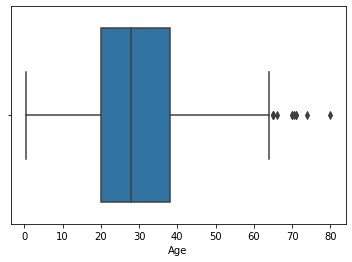

In [21]:
sns.boxplot(df_train['Age'])

In [23]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
df_train['Age']=df_train.fillna(df_train['Age'].mean())

In [27]:
df_train.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [28]:
from sklearn.preprocessing import LabelEncoder

In [10]:
X_test = df_train['Survived']
X_train = df_train.drop(columns=['Survived'])